In [60]:
import random
import json
from pprint import pprint
import nltk
import re
import string
from nltk.tag.stanford import StanfordPOSTagger
from nltk.tag.stanford import StanfordNERTagger

### import Standford POS Tagger and Stanford NER Tagger

In [6]:
#to run StanfordPostTagger and NERTagger, 
#first download these two packages from http://nlp.stanford.edu/software/CRF-NER.shtml 
#I saved the downloaded files in lib/
post = StanfordPOSTagger('lib/stanford-postagger-2014-08-27/models/english-bidirectional-distsim.tagger', 
                         'lib/stanford-postagger-2014-08-27/stanford-postagger.jar', 'utf-8') # doctest: +SKIP
# post.tag('What is the airspeed of an unladen swallow ?'.split()) # doctest: +SKIP
nert = StanfordNERTagger('lib/stanford-ner-2014-08-27/classifiers/english.all.3class.distsim.crf.ser.gz',
                         'lib/stanford-ner-2014-08-27/stanford-ner.jar', 'utf-8')

### make a random sample of 2 and smaple of 5 from the json data as starting data.
Note: only run this code once. Currently commented out. 

In [7]:
# with open('movies-with-roles-summaries.json')as data_file:
#     data = json.load(data_file)

# print(type(data))

In [8]:
# data_sample_2 = random.sample((data.items()), 2)

In [9]:
# data_sample_5 = random.sample((data.items()), 5)

In [10]:
# with open('data_sample_2.json', 'w') as outfile:
#     json.dump(data_sample_2, outfile)

In [11]:
# with open('data_sample_5.json', 'w') as outfile:
#     json.dump(data_sample_5, outfile)

###Load in the sample of five

In [12]:
with open('data_sample_5.json') as sample:
    sample = json.load(sample)

In [13]:
print(sample)

[['city after dark.1980', {'venue': 'T', 'language': None, 'title': 'City After Dark', 'id': 19412, 'ratings': '7.5', 'roles': [{'gender': 'F', 'role': 'Vanessa'}, {'gender': 'F', 'role': 'Nelie'}, {'gender': 'F', 'role': 'Kano'}, {'gender': 'F', 'role': 'Cora'}, {'gender': 'F', 'role': 'Bea'}, {'gender': 'F', 'role': 'Gaying'}, {'gender': 'F', 'role': 'Adelina'}, {'gender': 'F', 'role': "Vanessa's Mother"}, {'gender': 'F', 'role': 'Virgie'}, {'gender': 'F', 'role': 'Baby'}, {'gender': 'F', 'role': 'Marichu'}, {'gender': 'M', 'role': "Adelina's Client"}, {'gender': 'M', 'role': 'Manay Sharon'}, {'gender': 'M', 'role': 'Recruiter'}, {'gender': 'M', 'role': 'Mall couple'}, {'gender': 'M', 'role': 'Alex'}, {'gender': 'M', 'role': 'Pebrero'}, {'gender': 'M', 'role': 'Greggy Williams'}, {'gender': 'M', 'role': "Virgir's Husband"}], 'summaries_imdb': ["The hidden nightlife of ordinary people living in Manila unveils. Lovers and families' conflicts are radically pitted against each other as t

###More data cleaning

In [14]:
# get rid of ([[ in the wikipidia summaries
for i in range(len(sample)):
    summaries_wiki = sample[i][1]['summaries_wikipedia']
    if len(summaries_wiki) > 0:
        summaries_wiki = re.sub(r'\s\(\[\[', ' ', summaries_wiki[0])
        sample[i][1]['summaries_wikipedia'][0] = summaries_wiki

###Tagging

In [15]:
#pos tagging using nltk.pos_tag
#ner tagging using stanford ner tagger
def ie_preprocess(document, lower='false', stage="pos"):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    if lower == 'false':
        for sent in sentences:
            for i in range(len(sent)):
                if sent[i] != sent[i].lower():
                    sent[i] = sent[i].lower()
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    if stage == "pos":
        return sentences
    if stage == "ner":
        return nert.tag(document.split())

In [16]:
# pos + ner tag summaries and roles
for i in range(len(sample)):
    summaries_imdb = sample[i][1]["summaries_imdb"]
    summaries_wiki = sample[i][1]['summaries_wikipedia']
    roles = sample[i][1]['roles']
    if len(summaries_imdb) > 0:
        sample[i][1]["summaries_imdb_pos"] = ie_preprocess(summaries_imdb[0])
        sample[i][1]["summaries_imdb_ner"] = ie_preprocess(summaries_imdb[0], stage="ner")
    if len(summaries_wiki) > 0:
        sample[i][1]["summaries_wikipedia_pos"] = ie_preprocess(summaries_wiki[0])
        sample[i][1]["summaries_wikipedia_ner"] = ie_preprocess(summaries_wiki[0], stage='ner')

    
# #     ignore all the stuff below
#     if len(roles) > 0:
# #All words in roles are originally capitalized. This confuses the tagger and all words
# # are tagged NN*. So we lowercase all the words in role. 
#         for j in range(len(roles)):
#             roles[j]['role_pos'] = ie_preprocess(roles[j]["role"], lower="true")
#the NLP NER does not recognize named entities that are lowercase. It does do a good job
# tagging entities in sentences that are all capitalized. Therefore, we capitalize 
# all pos-tagged words in role for NER purposes.
#         for i in range(len(roles[j]['role_pos'][0])):
#             roles[j]['role_pos'][0][i] = list(roles[j]['role_pos'][0][i])
#             roles[j]['role_pos'][0][i][0] = roles[j]['role_pos'][0][i][0].capitalize()
# tag named entities using nltk.ne_chunk, didn't work well.
#         roles[j]['role_ne'] = [nltk.ne_chunk(pts) for pts in roles[j]['role_pos']]
            

In [17]:
#example result
sample[2][1]

{'id': 11106,
 'language': None,
 'num_ratings': '78401',
 'ratings': '5.9',
 'roles': [{'gender': 'F', 'role': 'DV8 Clubgoer'},
  {'gender': 'F', 'role': 'DV8 Clubgoer'},
  {'gender': 'F', 'role': 'Cheerleader/Dancer'},
  {'gender': 'F', 'role': 'Cheerleader/Dancer'},
  {'gender': 'F', 'role': 'DV8 Waitress'},
  {'gender': 'F', 'role': 'Cheerleader/Dancer'},
  {'gender': 'F', 'role': 'Churchgoer'},
  {'gender': 'F', 'role': 'Cheerleader/Dancer'},
  {'gender': 'F', 'role': 'Caged Go-Go Dancer'},
  {'gender': 'F', 'role': 'Tech Support Advisor'},
  {'gender': 'F', 'role': 'Play Actor'},
  {'gender': 'F', 'role': 'Cheerleader/Dancer'},
  {'gender': 'F', 'role': 'The Devil'},
  {'gender': 'F', 'role': 'Fly Girl'},
  {'gender': 'F', 'role': 'DV8 Clubgoer'},
  {'gender': 'F', 'role': 'Cheerleader/Dancer'},
  {'gender': 'F', 'role': 'Alison/Nicole'},
  {'gender': 'F', 'role': 'DV8 Clubgoer'},
  {'gender': 'F', 'role': 'Fly Girl'},
  {'gender': 'F', 'role': 'Cheerleader/Dancer'},
  {'gender':

In [18]:
#experimenting with nert tagging
nert.tag(sample[2][1]['summaries_wikipedia'][0].split())

[('Elliot', 'PERSON'),
 ('Richards', 'PERSON'),
 ('is', 'O'),
 ('a', 'O'),
 ('geeky,', 'O'),
 ('over-zealous', 'O'),
 ('man', 'O'),
 ('working', 'O'),
 ('a', 'O'),
 ('dead-end', 'O'),
 ('technical', 'O'),
 ('support', 'O'),
 ('job', 'O'),
 ('in', 'O'),
 ('a', 'O'),
 ('San', 'LOCATION'),
 ('Francisco', 'LOCATION'),
 ('computer', 'O'),
 ('company.', 'O'),
 ('He', 'O'),
 ('has', 'O'),
 ('no', 'O'),
 ('friends', 'O'),
 ('and', 'O'),
 ('his', 'O'),
 ('co-workers', 'O'),
 ('use', 'O'),
 ('him,', 'O'),
 ('knowing', 'O'),
 ('he', 'O'),
 ('will', 'O'),
 ('do', 'O'),
 ('anything', 'O'),
 ('for', 'O'),
 ('acceptance.', 'O'),
 ('He', 'O'),
 ('has', 'O'),
 ('a', 'O'),
 ('crush', 'O'),
 ('on', 'O'),
 ('his', 'O'),
 ('colleague,', 'O'),
 ('Alison', 'PERSON'),
 ('Gardner', 'PERSON'),
 (',', 'O'),
 ('but', 'O'),
 ('lacks', 'O'),
 ('the', 'O'),
 ('courage', 'O'),
 ('to', 'O'),
 ('ask', 'O'),
 ('her', 'O'),
 ('out.', 'O'),
 ('After', 'O'),
 ('Elliot', 'PERSON'),
 ('is', 'O'),
 ('again', 'O'),
 ('ditched'

##Experiment with customized tagger

We found out that the nltk chuncker works with customized tags too! 


In [67]:
#'A' is the customized tag
tagged = [[['As', 'A'],
     ('Constance', 'A'),
     ('becomes', 'A'),
     ('more', 'A'),
     ('and', 'CC'),
     ('more', 'JJR'),
     ('protective', 'JJ'),
     ('of', 'IN'),
     ('little', 'JJ'),
     ('Angelica', 'NNP'),
     (',', ','),
     ('a', 'DT'),
     ('ghostly', 'RB'),
     ('predator', 'NN'),
     ('begins', 'VBZ'),
     ('to', 'TO'),
     ('make', 'VB'),
     ('its', 'PRP$'),
     ('way', 'NN'),
     ('through', 'IN'),
     ('the', 'DT'),
     ('house', 'NN'),
     ('late', 'RB'),
     ('at', 'IN'),
     ('night', 'NN'),
     ('...', ':'),
     ('ANGELICA', 'NNP'),
     ('is', 'VBZ'),
     ('a', 'DT'),
     ('spellbinding', 'NN'),
     ('ghost', 'NN'),
     ('story', 'NN'),
     ('about', 'IN'),
     ('desire', 'NN'),
     (',', ','),
     ('repression', 'NN'),
     ('and', 'CC'),
     ('its', 'PRP$'),
     ('consequences', 'NNS'),
     ('...', ':')]]

In [68]:
#chucker picked out <A>
cp = nltk.RegexpParser('CHUNK: {<A>+<CC>}')
# brown = nltk.corpus.brown
for sent in tagged:
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'CHUNK': print(subtree)


ValueError: chunk structures must contain tagged tokens or trees

## Attempt to NER tag the text in roles with nltk.chuck: failed

NER does a poor job tagging named entities in the roles. This is because the roles are short phrases, not full sentences, and NER is not designed to tag short phrases.

In addition, we did find a tool that would conveniently make the nltk.ne_chuck text usable with nltk.chuck. We decided to use the Stanford NER tagger, which works well with nltk.chuck.

With this finding in mind, we went on to develop other extraction methods using regular expression.

###experiment with NLTK Named Entity Recognition (NER)

In [21]:
# sent = nltk.corpus.treebank.tagged_sents()
sent = [[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'NNP'), ('Years', 'NNS'), ('Old', 'NNP'), (',', ','), ('Will', 'NNP'), ('Join', 'NNP'), ('The', 'NNP'), ('Board', 'NNP'), ('As', 'NNP'), ('A', 'NNP'), ('Nonexecutive', 'NNP'), ('Director', 'NNP'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'NNP'), ('chairman', 'NNP'), ('of', 'NNP'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'NNP'), ('Dutch', 'NNP'), ('publishing', 'NNP'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')]]
# print(nltk.ne_chunk(sent)
pprint([nltk.ne_chunk(pts) for pts in sent])

[Tree('S', [Tree('PERSON', [('Pierre', 'NNP')]), Tree('ORGANIZATION', [('Vinken', 'NNP')]), (',', ','), ('61', 'NNP'), ('Years', 'NNS'), ('Old', 'NNP'), (',', ','), Tree('PERSON', [('Will', 'NNP'), ('Join', 'NNP'), ('The', 'NNP'), ('Board', 'NNP')]), ('As', 'NNP'), ('A', 'NNP'), ('Nonexecutive', 'NNP'), ('Director', 'NNP'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Mr.', 'NNP')]), Tree('PERSON', [('Vinken', 'NNP')]), ('is', 'NNP'), ('chairman', 'NNP'), ('of', 'NNP'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'NNP'), Tree('PERSON', [('Dutch', 'NNP')]), ('publishing', 'NNP'), ('group', 'NN'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Rudolph', 'NNP')]), Tree('GPE', [('Agnew', 'NNP')]), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), Tree('ORGANIZATION', [('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP')]), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), (

In [22]:
type(sent)

list

The function below can potentially be useful.

In [23]:
# for n in chunked:
#     if isinstance(n, nltk.tree.Tree):               
#         if n.node == 'NP':
#             do_something_with_subtree(n)
#         else:
#             do_something_with_leaf(n)

In [24]:
print(sent[:3])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'NNP'), ('Years', 'NNS'), ('Old', 'NNP'), (',', ','), ('Will', 'NNP'), ('Join', 'NNP'), ('The', 'NNP'), ('Board', 'NNP'), ('As', 'NNP'), ('A', 'NNP'), ('Nonexecutive', 'NNP'), ('Director', 'NNP'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'NNP'), ('chairman', 'NNP'), ('of', 'NNP'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'NNP'), ('Dutch', 'NNP'), ('publishing', 'NNP'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')]]


##Attempt to tag summaries with Stanford NER tagger: Success!

At the beginning of this notebook, we instantiated the standford pos tagger as post, and the stanford ner tag as nert.

In [25]:
# stanford tagger doesn't tag punctuations.
post.tag(sample[1][1]["summaries_imdb"])


[('In', 'IN'),
 ('Victorian', 'JJ'),
 ('England,', 'NN'),
 ('sexual', 'JJ'),
 ('repression', 'NN'),
 ('opens', 'VBZ'),
 ('a', 'DT'),
 ('rift', 'NN'),
 ('between', 'IN'),
 ('young', 'JJ'),
 ('couple', 'NN'),
 ('Constance', 'NNP'),
 ('and', 'CC'),
 ('Joseph', 'NNP'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('birth', 'NN'),
 ('of', 'IN'),
 ('their', 'PRP$'),
 ('daughter', 'NN'),
 ('Angelica.', 'NNP'),
 ('As', 'IN'),
 ('Constance', 'NNP'),
 ('becomes', 'VBZ'),
 ('more', 'RBR'),
 ('and', 'CC'),
 ('more', 'RBR'),
 ('protective', 'JJ'),
 ('of', 'IN'),
 ('little', 'JJ'),
 ('Angelica,', 'NN'),
 ('a', 'DT'),
 ('ghostly', 'JJ'),
 ('predator', 'NN'),
 ('begins', 'VBZ'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('its', 'PRP$'),
 ('way', 'NN'),
 ('through', 'IN'),
 ('the', 'DT'),
 ('house', 'NN'),
 ('late', 'RB'),
 ('at', 'IN'),
 ('night...', 'NNP'),
 ('ANGELICA', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('spellbinding', 'JJ'),
 ('ghost', 'NN'),
 ('story', 'NN'),
 ('about', 'IN'),
 ('desire,', 'NN'),
 ('repression

In [26]:
nert.tag(sample[1][1]["summaries_imdb"][0].split())
# nert.tag('Rami Eid is studying at Stony Brook University in NY'.split())

[('In', 'O'),
 ('Victorian', 'O'),
 ('England,', 'O'),
 ('sexual', 'O'),
 ('repression', 'O'),
 ('opens', 'O'),
 ('a', 'O'),
 ('rift', 'O'),
 ('between', 'O'),
 ('young', 'O'),
 ('couple', 'O'),
 ('Constance', 'PERSON'),
 ('and', 'O'),
 ('Joseph', 'PERSON'),
 ('after', 'O'),
 ('the', 'O'),
 ('birth', 'O'),
 ('of', 'O'),
 ('their', 'O'),
 ('daughter', 'O'),
 ('Angelica.', 'O'),
 ('As', 'O'),
 ('Constance', 'PERSON'),
 ('becomes', 'O'),
 ('more', 'O'),
 ('and', 'O'),
 ('more', 'O'),
 ('protective', 'O'),
 ('of', 'O'),
 ('little', 'O'),
 ('Angelica,', 'O'),
 ('a', 'O'),
 ('ghostly', 'O'),
 ('predator', 'O'),
 ('begins', 'O'),
 ('to', 'O'),
 ('make', 'O'),
 ('its', 'O'),
 ('way', 'O'),
 ('through', 'O'),
 ('the', 'O'),
 ('house', 'O'),
 ('late', 'O'),
 ('at', 'O'),
 ('night...', 'O'),
 ('ANGELICA', 'O'),
 ('is', 'O'),
 ('a', 'O'),
 ('spellbinding', 'O'),
 ('ghost', 'O'),
 ('story', 'O'),
 ('about', 'O'),
 ('desire,', 'O'),
 ('repression', 'O'),
 ('and', 'O'),
 ('its', 'O'),
 ('consequences

In [27]:
# nert.tag(sample[2][1]["roles"][0]["role"].split())
nert.tag('Michael With Red Hair From London'.split())


[('Michael', 'PERSON'),
 ('With', 'O'),
 ('Red', 'O'),
 ('Hair', 'O'),
 ('From', 'O'),
 ('London', 'LOCATION')]

In [28]:
# NERT doesn't tag pos tagged sentences...
sample2 = [('In', 'IN'),
 ('Victorian', 'JJ'),
 ('England,', 'NN'),
 ('sexual', 'JJ'),
 ('repression', 'NN'),
 ('opens', 'VBZ'),
 ('a', 'DT'),
 ('rift', 'NN'),
 ('between', 'IN'),
 ('young', 'JJ'),
 ('couple', 'NN'),
 ('Constance', 'NNP'),
 ('and', 'CC'),
 ('Joseph', 'NNP'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('birth', 'NN'),
 ('of', 'IN'),
 ('their', 'PRP$'),
 ('daughter', 'NN'),
 ('Angelica', 'NNP'),
 (".", '.')]
nert.tag(sample2[0])

[('In', 'O'), ('IN', 'O')]

In [29]:
nert.tag(sample[1][1]["summaries_imdb"][0].split())
# nert.tag('Rami Eid is studying at Stony Brook University in NY'.split())

[('In', 'O'),
 ('Victorian', 'O'),
 ('England,', 'O'),
 ('sexual', 'O'),
 ('repression', 'O'),
 ('opens', 'O'),
 ('a', 'O'),
 ('rift', 'O'),
 ('between', 'O'),
 ('young', 'O'),
 ('couple', 'O'),
 ('Constance', 'PERSON'),
 ('and', 'O'),
 ('Joseph', 'PERSON'),
 ('after', 'O'),
 ('the', 'O'),
 ('birth', 'O'),
 ('of', 'O'),
 ('their', 'O'),
 ('daughter', 'O'),
 ('Angelica.', 'O'),
 ('As', 'O'),
 ('Constance', 'PERSON'),
 ('becomes', 'O'),
 ('more', 'O'),
 ('and', 'O'),
 ('more', 'O'),
 ('protective', 'O'),
 ('of', 'O'),
 ('little', 'O'),
 ('Angelica,', 'O'),
 ('a', 'O'),
 ('ghostly', 'O'),
 ('predator', 'O'),
 ('begins', 'O'),
 ('to', 'O'),
 ('make', 'O'),
 ('its', 'O'),
 ('way', 'O'),
 ('through', 'O'),
 ('the', 'O'),
 ('house', 'O'),
 ('late', 'O'),
 ('at', 'O'),
 ('night...', 'O'),
 ('ANGELICA', 'O'),
 ('is', 'O'),
 ('a', 'O'),
 ('spellbinding', 'O'),
 ('ghost', 'O'),
 ('story', 'O'),
 ('about', 'O'),
 ('desire,', 'O'),
 ('repression', 'O'),
 ('and', 'O'),
 ('its', 'O'),
 ('consequences

In [30]:
# Punctuations matter for picking out the correct entities.
nert.tag('Rami Eid is studying at Stony Brook University in NY , and he is a good boy . he does a lot of nice things Jasmine thought so too she lives in california'.split())

[('Rami', 'PERSON'),
 ('Eid', 'PERSON'),
 ('is', 'O'),
 ('studying', 'O'),
 ('at', 'O'),
 ('Stony', 'ORGANIZATION'),
 ('Brook', 'ORGANIZATION'),
 ('University', 'ORGANIZATION'),
 ('in', 'ORGANIZATION'),
 ('NY', 'ORGANIZATION'),
 (',', 'O'),
 ('and', 'O'),
 ('he', 'O'),
 ('is', 'O'),
 ('a', 'O'),
 ('good', 'O'),
 ('boy', 'O'),
 ('.', 'O'),
 ('he', 'O'),
 ('does', 'O'),
 ('a', 'O'),
 ('lot', 'O'),
 ('of', 'O'),
 ('nice', 'O'),
 ('things', 'O'),
 ('Jasmine', 'PERSON'),
 ('thought', 'O'),
 ('so', 'O'),
 ('too', 'O'),
 ('she', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('california', 'LOCATION')]

## Experiment with chunker

In [31]:
# Import the RegexpParser
from nltk.chunk import RegexpParser

# Define custom tagged entities - group NE's together 

def chunker_rules(values):
    # Define  custom grammar (modified to be a valid regex).
    grammar = r'''
        PERSON:
                {<PERSON><O><PERSON>+}
                {<PERSON>+}
            '''
    cp = nltk.RegexpParser(grammar) # Create an instance of your custom parser.
    return cp.parse(values)         # Parse!

def entity_chunker(tagged_docs):
    chunks = []
#     for doc in tagged_docs:
    tree = chunker_rules(tagged_docs)
    for subtree in tree.subtrees():
#             if (subtree.node == 'WIDOW'):
        leaflist = [leaf[0] for leaf in subtree.leaves()]
        chunks.append(' '.join(leaflist))
    return chunks
 


In [32]:
# TODO: need to put a " " before punctuations in order for the word before the punctuation
# to be properly detected.
example = [('Rami', 'PERSON'),
 ('Eid', 'PERSON'),
 ('is', 'O'),
 ('studying', 'O'),
 ('at', 'O'),
 ('Stony', 'ORGANIZATION'),
 ('Brook', 'ORGANIZATION'),
 ('University', 'ORGANIZATION'),
 ('in', 'ORGANIZATION'),
 ('NY', 'ORGANIZATION'),
 (',', 'O'),
 ('and', 'O'),
 ('he', 'O'),
 ('is', 'O'),
 ('a', 'O'),
 ('good', 'O'),
 ('boy', 'O'),
 ('.', 'O')]

In [33]:
entity_chunker(example)

['Rami Eid is studying at Stony Brook University in NY , and he is a good boy .',
 'Rami Eid']

In [34]:
###can chunker define alternative grammers??"
cp = nltk.RegexpParser('PERSON:{<PERSON>+}')
# brown = nltk.corpus.brown
# for sent in tagged:
tree = cp.parse(example)
for subtree in tree.subtrees():
    if subtree.label() == 'PERSON': print(subtree)

(PERSON Rami/PERSON Eid/PERSON)


In [35]:
print(tree)

(S
  (PERSON Rami/PERSON Eid/PERSON)
  is/O
  studying/O
  at/O
  Stony/ORGANIZATION
  Brook/ORGANIZATION
  University/ORGANIZATION
  in/ORGANIZATION
  NY/ORGANIZATION
  ,/O
  and/O
  he/O
  is/O
  a/O
  good/O
  boy/O
  ./O)


### TODO: Replace more /O with names from the SSN database.

###Search for a ner tagged name in the roles bag of words

In [36]:
sample

[['city after dark.1980',
  {'id': 19412,
   'language': None,
   'num_ratings': '94',
   'ratings': '7.5',
   'roles': [{'gender': 'F', 'role': 'Vanessa'},
    {'gender': 'F', 'role': 'Nelie'},
    {'gender': 'F', 'role': 'Kano'},
    {'gender': 'F', 'role': 'Cora'},
    {'gender': 'F', 'role': 'Bea'},
    {'gender': 'F', 'role': 'Gaying'},
    {'gender': 'F', 'role': 'Adelina'},
    {'gender': 'F', 'role': "Vanessa's Mother"},
    {'gender': 'F', 'role': 'Virgie'},
    {'gender': 'F', 'role': 'Baby'},
    {'gender': 'F', 'role': 'Marichu'},
    {'gender': 'M', 'role': "Adelina's Client"},
    {'gender': 'M', 'role': 'Manay Sharon'},
    {'gender': 'M', 'role': 'Recruiter'},
    {'gender': 'M', 'role': 'Mall couple'},
    {'gender': 'M', 'role': 'Alex'},
    {'gender': 'M', 'role': 'Pebrero'},
    {'gender': 'M', 'role': 'Greggy Williams'},
    {'gender': 'M', 'role': "Virgir's Husband"}],
   'summaries_imdb': ["The hidden nightlife of ordinary people living in Manila unveils. Lovers 

####First, combine wiki summaries and imdb summaries into one string. 

In [37]:
# combine wiki_ner and imdb_ner
for i in range(len(sample)):
#     summaries_imdb_ner is indeed a list
    summaries_imdb_ner = sample[i][1]["summaries_imdb_ner"]
    if 'summaries_wikipedia_ner' in sample[i][1]:
        summaries_wiki_ner = sample[i][1]['summaries_wikipedia_ner']
    else: summaries_wiki_ner = []
    summaries_imdb_ner.extend(summaries_wiki_ner)
    sample[i][1]['summaries_combined_ner'] = summaries_imdb_ner

In [38]:
sample[2][1]['summaries_combined_ner'] 

[('Elliot', 'PERSON'),
 ('Richardson,', 'O'),
 ('a', 'O'),
 ('socially', 'O'),
 ('awkward', 'O'),
 ('IT', 'O'),
 ('worker,', 'O'),
 ('is', 'O'),
 ('given', 'O'),
 ('seven', 'O'),
 ('wishes', 'O'),
 ('to', 'O'),
 ('get', 'O'),
 ('the', 'O'),
 ('girl', 'O'),
 ('of', 'O'),
 ('his', 'O'),
 ('dreams', 'O'),
 ('when', 'O'),
 ('he', 'O'),
 ('meets', 'O'),
 ('up', 'O'),
 ('with', 'O'),
 ('a', 'O'),
 ('very', 'O'),
 ('seductive', 'O'),
 ('Satan.', 'O'),
 ('The', 'O'),
 ('catch:', 'O'),
 ('his', 'O'),
 ('soul.', 'O'),
 ('Some', 'O'),
 ('of', 'O'),
 ('his', 'O'),
 ('wishes', 'O'),
 ('include', 'O'),
 ('being', 'O'),
 ('a', 'O'),
 ('7', 'O'),
 ('foot', 'O'),
 ('basketball', 'O'),
 ('star,', 'O'),
 ('a', 'O'),
 ('wealthy,', 'O'),
 ('powerful', 'O'),
 ('man,', 'O'),
 ('and', 'O'),
 ('a', 'O'),
 ('sensitive', 'O'),
 ('caring', 'O'),
 ('guy.', 'O'),
 ('But,', 'O'),
 ('as', 'O'),
 ('could', 'O'),
 ('be', 'O'),
 ('expected,', 'O'),
 ('the', 'O'),
 ('Devil', 'O'),
 ('must', 'O'),
 ('put', 'O'),
 ('her', 

####Run chuncker to lift out tagged names from summaries

In [39]:
# creating a new dict called sum_and_char to store summaries and corresponding characters
sum_and_char = {}
for i in range(len(sample)):
#     making a bag of words for roles
    roles_bag = []
    roles = sample[i][1]['roles']
    for j in range(len(roles)):
        roles_bag.append(roles[j]['role'])
    str = " ".join(roles_bag)
#     split roles on space, /, ' or "
    roles_bag = re.split(r' |/|\'|\"', str)
#     sorting entity_chuncking results into summaries and characters
    result = entity_chunker(sample[i][1]['summaries_combined_ner'])
    movie_name = sample[i][0]
    if len(result) <= 1:
        char_data = {}
    else:
        char_data = set(result[1:])
    sum_and_char[movie_name] = {"sum": result[0], \
                                "char_raw": char_data,\
                                "roles_bag": set(roles_bag)}
pprint(sum_and_char)

{'angelica.2015': {'char_raw': {'Constance',
                                'Constance and Joseph',
                                'Mitchell'},
                   'roles_bag': {'Angelica',
                                 'Anne',
                                 'Barton',
                                 'Beggar',
                                 'Bookseller',
                                 'Boy',
                                 'Constance',
                                 'Dr.',
                                 'Girl',
                                 'Joseph',
                                 'Lady',
                                 'Medical',
                                 'Midwife',
                                 'Montague',
                                 'Mr.',
                                 'Nora',
                                 'Older',
                                 'Park',
                                 'Pendleton',
                                 'Scienti

####Check characters against roles for filtering

In [40]:
print("*************************")
print("filtered character list")
print("*************************")

for key, value in sum_and_char.items():
    sum_and_char[key]['char_filtered'] = []
    for char in value['char_raw']:
        flag = False
        char_split = char.split()
        for elem in char_split:
            if elem in value['roles_bag']:
                flag = True
        if flag == True:
            sum_and_char[key]['char_filtered'].append(char)
    print(sum_and_char[key]['char_filtered'])
            
# compare with the raw list of characters before filtering
# "dorcy" is not captured from richard palmer grant
# TODO: capture capitalized word right after the character name and make it part of the character name.
print("*************************")
print("raw character list")
print("*************************")

for value in sum_and_char.values():
#     pprint(values):
    for char in value['char_raw']:
        print(char)
        

*************************
filtered character list
*************************
['Biddle tells Dick', 'Dick', 'Fitts', 'Biddle', 'Dick Powell', 'Biddle John Eldredge', 'Kit', "Scrapper Thornhill Pat O'Brien", 'Biddle blames Dick']
[]
[]
['Constance', 'Constance and Joseph']
['Bob', 'Abraham Lincoln', 'Elliot asks Alison', 'Nicole Delarusso', 'Alison', 'Elliot Richards', 'Alison Gardner', 'Elliot']
*************************
raw character list
*************************
Biddle tells Dick
Dick
Fitts
Biddle
Dick Powell
Biddle John Eldredge
Richard Palmer Grant
Kit
Scrapper Thornhill Pat O'Brien
Biddle blames Dick
Ishmael Bernal
Mitchell
Constance
Constance and Joseph
Bob
Satan
Abraham Lincoln
Elliot asks Alison
Nicole Delarusso
Alison
Elliot Richards
Alison Gardner
Elliot


In [41]:
# the final shape of the sum_and _char dict
sum_and_char

{'angelica.2015': {'char_filtered': ['Constance', 'Constance and Joseph'],
  'char_raw': {'Constance', 'Constance and Joseph', 'Mitchell'},
  'roles_bag': {'Angelica',
   'Anne',
   'Barton',
   'Beggar',
   'Bookseller',
   'Boy',
   'Constance',
   'Dr.',
   'Girl',
   'Joseph',
   'Lady',
   'Medical',
   'Midwife',
   'Montague',
   'Mr.',
   'Nora',
   'Older',
   'Park',
   'Pendleton',
   'Scientist',
   'Snobby',
   'Spirit',
   'Student',
   'Unnamed',
   'Woman',
   'Young',
   'girl',
   'in'},
  'sum': 'In Victorian England, sexual repression opens a rift between young couple Constance and Joseph after the birth of their daughter Angelica. As Constance becomes more and more protective of little Angelica, a ghostly predator begins to make its way through the house late at night... ANGELICA is a spellbinding ghost story about desire, repression and its consequences... The new film by Mitchell Lichtenstein, director of HAPPY TEARS and the cult favorite TEETH.'},
 'bedazzled.20

##Define summary chunking regexp

Now that we have a filtered list of names, let's define regular expressions to look for patterns surrounding these names in the summary texts. Our goal is to lift out the roles related to these names.

####Experiment scrap, ignore

In [42]:
string = "John is a farmer."
p = re.compile('John is a (.*)')
m = p.search(string)

In [43]:
m.group(1)

'farmer.'

In [44]:
regex_str = '(.*) is a (.*)'
f = re.search(regex_str, string)

In [45]:
f.group(2)

'farmer.'

In [46]:
# #failed attempt to make the matching process a function.
# def summary_match(regex, dictionary = sum_and_char):
#     '''
#     matches summary texts with the desired regex
#     input:
#         - regex: the regular expression patter
#         - dictionary: a dictionary with the same structure as sum_and_char
#     output:
#         - matched string(s)
#     '''
#     for key, value in dictionary.items():
#         for char in value['char_filtered']:
#             regex_str = char + ' is a ([^.]+?)\.'
#             print(regex_str)
#             p = re.compile(regex_str)
#             m = p.search(value['sum'])
#             if m:
#                 print(m.group(1))
#             else:
#                 print('no match')

####Extract patterns

In [47]:
for key, value in sum_and_char.items():
    for char in value['char_filtered']:
        regex_str = char + ' is a ([^.]+?)\.'
        print(regex_str)
        p = re.compile(regex_str)
        m = p.search(value['sum'])
        if m:
            print(m.group(1))
        else:
            print('no match')

Biddle tells Dick is a ([^.]+?)\.
no match
Dick is a ([^.]+?)\.
no match
Fitts is a ([^.]+?)\.
no match
Biddle is a ([^.]+?)\.
no match
Dick Powell is a ([^.]+?)\.
no match
Biddle John Eldredge is a ([^.]+?)\.
no match
Kit is a ([^.]+?)\.
no match
Scrapper Thornhill Pat O'Brien is a ([^.]+?)\.
no match
Biddle blames Dick is a ([^.]+?)\.
no match
Constance is a ([^.]+?)\.
no match
Constance and Joseph is a ([^.]+?)\.
no match
Bob is a ([^.]+?)\.
no match
Abraham Lincoln is a ([^.]+?)\.
no match
Elliot asks Alison is a ([^.]+?)\.
no match
Nicole Delarusso is a ([^.]+?)\.
no match
Alison is a ([^.]+?)\.
no match
Elliot Richards is a ([^.]+?)\.
geeky, over-zealous man working a dead-end technical support job in a San Francisco computer company
Alison Gardner is a ([^.]+?)\.
no match
Elliot is a ([^.]+?)\.
no match


In [48]:
post.tag(('John is a ' + 'geeky, over-zealous man working a dead-end technical support job in a San Francisco computer company').split())

[('John', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('geeky,', 'NN'),
 ('over-zealous', 'JJ'),
 ('man', 'NN'),
 ('working', 'VBG'),
 ('a', 'DT'),
 ('dead-end', 'JJ'),
 ('technical', 'JJ'),
 ('support', 'NN'),
 ('job', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('San', 'NNP'),
 ('Francisco', 'NNP'),
 ('computer', 'NN'),
 ('company', 'NN')]

In [49]:
for key, value in sum_and_char.items():
    for char in value['char_filtered']:
        regex_str = char + ', a ([^.]+?)\.'
        print(regex_str)
        p = re.compile(regex_str)
        m = p.search(value['sum'])
        if m:
            print(m.group(1))
        else:
            print('no match')

Biddle tells Dick, a ([^.]+?)\.
no match
Dick, a ([^.]+?)\.
no match
Fitts, a ([^.]+?)\.
no match
Biddle, a ([^.]+?)\.
no match
Dick Powell, a ([^.]+?)\.
no match
Biddle John Eldredge, a ([^.]+?)\.
no match
Kit, a ([^.]+?)\.
no match
Scrapper Thornhill Pat O'Brien, a ([^.]+?)\.
no match
Biddle blames Dick, a ([^.]+?)\.
no match
Constance, a ([^.]+?)\.
no match
Constance and Joseph, a ([^.]+?)\.
no match
Bob, a ([^.]+?)\.
no match
Abraham Lincoln, a ([^.]+?)\.
no match
Elliot asks Alison, a ([^.]+?)\.
no match
Nicole Delarusso, a ([^.]+?)\.
no match
Alison, a ([^.]+?)\.
sports reporter, to lose interest in him shortly after they meet
Elliot Richards, a ([^.]+?)\.
socially incompetent technical advisor working at a call-center, has had a crush on Alison Gardner for nearly four years
Alison Gardner, a ([^.]+?)\.
no match
Elliot, a ([^.]+?)\.
no match


###Lift out the roles of characters using chunking

In [50]:
string = post.tag("socially incompetent technical advisor working at a call-center, \
has had a crush on Alison Gardner for nearly four years".split())
string

[('socially', 'RB'),
 ('incompetent', 'JJ'),
 ('technical', 'JJ'),
 ('advisor', 'NN'),
 ('working', 'VBG'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('call-center,', 'NN'),
 ('has', 'VBZ'),
 ('had', 'VBN'),
 ('a', 'DT'),
 ('crush', 'NN'),
 ('on', 'IN'),
 ('Alison', 'NNP'),
 ('Gardner', 'NNP'),
 ('for', 'IN'),
 ('nearly', 'RB'),
 ('four', 'CD'),
 ('years', 'NNS')]

In [51]:
# TODO: define multiple grammar
#TODO for Jordan: how to get the plain text output?
cp = nltk.RegexpParser('CHUNK: {^<.*>+?<NN.*>+}')
# brown = nltk.corpus.brown
# for sent in tagged:
tree = cp.parse(string)
for subtree in tree.subtrees():
    if subtree.label() == 'CHUNK': 
        print(subtree)
        test_str = subtree


(CHUNK socially/RB incompetent/JJ technical/JJ advisor/NN)


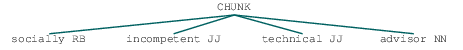

In [52]:
test_str

In [53]:
str = "mother/father - tv report, Jenny"
test_1 = re.split(r', | |/|\'|\| - "', str)


In [54]:
test_1

['mother', 'father', '-', 'tv', 'report', 'Jenny']